## DIAMOND VALUATION PREDICTION

DATASET USED:- price price in US dollars

carat :- weight of the diamond

cut :- quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color :- diamond colour, from J (worst) to D (best)

clarity :- a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x :- length in mm 

y :- width in mm 

z :- depth in mm 

table :- width of top of diamond relative to widest point

depth :- total depth percentage = z / mean(x, y) = 2 * z / (x + y)

### A data frame with 53940 rows and 10 variables

In [162]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline

In [164]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [165]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [166]:
!pip install xgboost
from xgboost import XGBRegressor

In [167]:
df = pd.read_csv(r'diamonds.csv')

In [168]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [169]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [170]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [172]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [173]:
new_df = df.copy()

In [174]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
new_df['cut']= label_encoder.fit_transform(new_df['cut'])
  
new_df['cut'].unique()

array([2, 3, 1, 4, 0])

In [175]:
df.duplicated().sum()

146

In [176]:
df = df.drop_duplicates()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [178]:
input

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [179]:
target

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [180]:
num = input.select_dtypes(['int64', 'float64'])
cat = input.select_dtypes('object')

In [181]:
num

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [182]:
cat

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


## Feature Engineering

In [183]:
cols = num.columns # one or more

Q1 = num[cols].quantile(0.25)
Q3 = num[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((num[cols] < (Q1 - 1.5 * IQR)) | (num[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [187]:
input = df.drop("price", axis=1)
target = df[['price']]

In [188]:
num = input.select_dtypes(['int64', 'float64'])
cat = input.select_dtypes('object')

In [189]:
num.shape

(49191, 6)

In [190]:
cat.shape

(49191, 3)

### Using correlation matrix for numerical feature selection

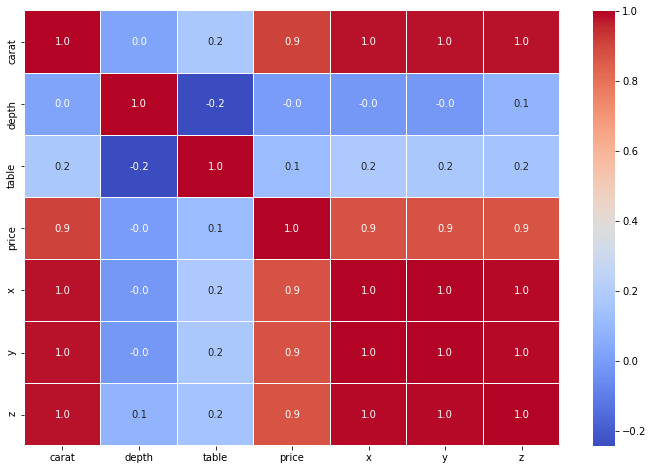

In [191]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.001f', linewidths=.01)
plt.show()

In [192]:
num.isna().sum()

carat    0
depth    0
table    0
x        0
y        0
z        0
dtype: int64

In [193]:
varselector= VarianceThreshold(threshold=0.1)

In [194]:
varselector.fit(num)
cols = varselector.get_support(indices=True)
num = num.iloc[:,cols]

#### Since no columns meets the threshold of 0.1, we wont drop any column

In [195]:
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform' )
num_binned = pd.DataFrame(discrete.fit_transform(num), index=num.index, columns=num.columns) .add_suffix('_Rank')

In [196]:
num_binned

,carat_Rank,depth_Rank,table_Rank,x_Rank,y_Rank,z_Rank
0,0.0,4.0,2.0,0.0,0.0,2.0
1,0.0,1.0,7.0,0.0,0.0,2.0
3,0.0,6.0,5.0,1.0,1.0,3.0
4,0.0,7.0,5.0,1.0,1.0,3.0
5,0.0,6.0,4.0,0.0,0.0,2.0
...,...,...,...,...,...,...
53935,2.0,3.0,4.0,4.0,4.0,5.0
53936,2.0,7.0,2.0,4.0,4.0,5.0
53937,2.0,6.0,7.0,4.0,4.0,5.0
53938,3.0,3.0,5.0,5.0,5.0,5.0


In [197]:
num_binned.describe()

,carat_Rank,depth_Rank,table_Rank,x_Rank,y_Rank,z_Rank
count,49191.000000,49191.000000,49191.000000,49191.000000,49191.000000,49191.000000
mean,2.470432,4.557785,4.270415,3.628225,3.739932,4.799882
std,2.257552,1.858873,1.782165,2.208832,2.228856,1.648695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,2.000000,2.000000,3.000000
50%,2.000000,5.000000,4.000000,4.000000,4.000000,5.000000
75%,4.000000,6.000000,6.000000,5.000000,6.000000,6.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


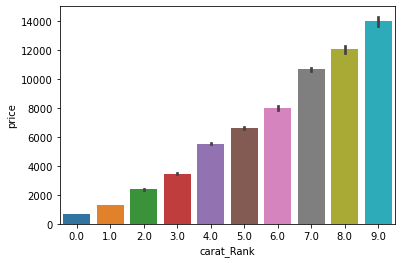

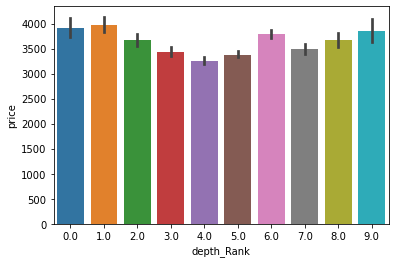

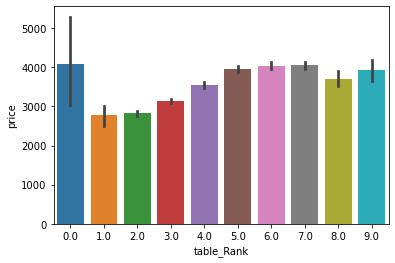

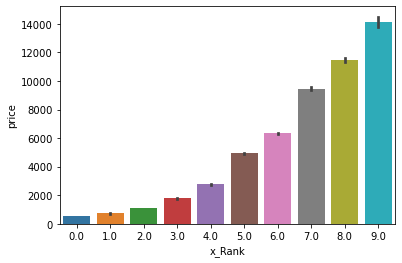

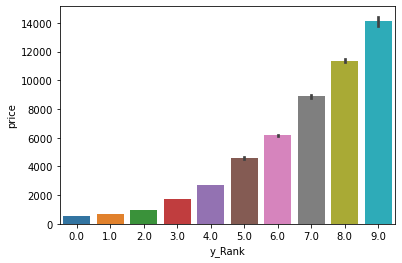

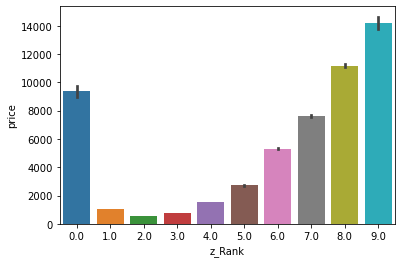

In [198]:
Xbinned = pd.concat([target,num_binned], axis=1, join='inner')

for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y='price', data= Xbinned, estimator=mean)
plt.show()    

In [199]:
num.describe()

,carat,depth,table,x,y,z
count,49191.000000,49191.000000,49191.000000,49191.000000,49191.000000,49191.000000
mean,0.740451,61.783458,57.271249,5.616158,5.620879,3.471091
std,0.401135,1.106954,2.019533,1.027540,1.021784,0.635229
min,0.200000,58.800000,51.600000,3.730000,3.680000,1.410000
25%,0.380000,61.100000,56.000000,4.670000,4.680000,2.880000
50%,0.700000,61.900000,57.000000,5.610000,5.610000,3.470000
75%,1.020000,62.500000,59.000000,6.470000,6.470000,4.000000
max,2.000000,64.700000,63.500000,8.340000,8.270000,5.300000


In [200]:
for col in num.columns:
    print(df[col].corr(df['price']))

0.9090745668966098
-0.0020106739662193807
0.12000473119536159
0.874819364030513
0.8761447743129023
0.8716825152888323


#### Since correlation for depth is very less, we can drop that column

In [201]:
num.drop('depth', axis=1, inplace=True)
num

,carat,table,x,y,z
0,0.23,55.0,3.95,3.98,2.43
1,0.21,61.0,3.89,3.84,2.31
3,0.29,58.0,4.20,4.23,2.63
4,0.31,58.0,4.34,4.35,2.75
5,0.24,57.0,3.94,3.96,2.48
...,...,...,...,...,...
53935,0.72,57.0,5.75,5.76,3.50
53936,0.72,55.0,5.69,5.75,3.61
53937,0.70,60.0,5.66,5.68,3.56
53938,0.86,58.0,6.15,6.12,3.74


### Now let us start dealing with the categorical columns

In [202]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49191 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cut      49191 non-null  object
 1   color    49191 non-null  object
 2   clarity  49191 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB


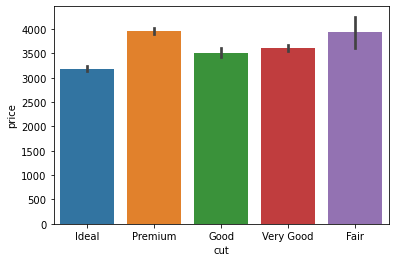

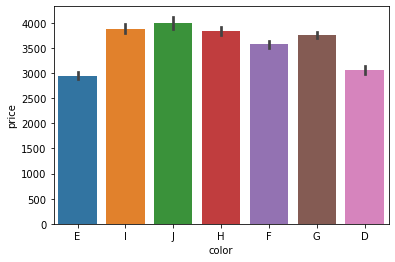

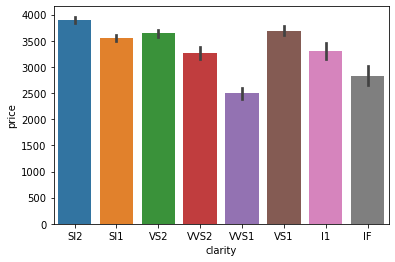

In [203]:
Xchar = pd.concat([target,cat], axis=1, join='inner')

for col in (cat.columns):
    plt.figure()
    sns.barplot(x = col, y = 'price', data = Xchar, estimator=mean)
plt.show()

In [204]:
X_char_dum = pd.get_dummies(cat, drop_first = True)
X_char_dum.shape

(49191, 17)

In [205]:
X_char_dum

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [206]:
import sklearn
sklearn.__version__

'0.24.1'

In [207]:
Xall = pd.concat([num, X_char_dum], axis=1, join='inner')
Xall.head()

,carat,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,3.95,3.98,2.43,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,3.89,3.84,2.31,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,4.20,4.23,2.63,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,58.0,4.34,4.35,2.75,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,57.0,3.94,3.96,2.48,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [208]:
Xall.shape

(49191, 22)

## Splitting of data

In [209]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xall, target, test_size=0.2, random_state=101)

In [210]:
print("Shape of Training Data",Xtrain. shape)
print("\nShape of Testing Data",Xtest.shape)
print("\nMean price in Training Data", Ytrain.mean())
print("\nMean price in Testing Data",Ytest.mean())

Shape of Training Data (39352, 22)

Shape of Testing Data (9839, 22)

Mean price in Training Data price    3526.532603
dtype: float64

Mean price in Testing Data price    3476.664397
dtype: float64


## Making pipelines and fitting models

In [214]:
pipeline_lr=Pipeline([("lr_regressor", LinearRegression())])
pipeline_dt=Pipeline([("dt_regressor" ,DecisionTreeRegressor())])
pipeline_rf=Pipeline([("rf_regressor" ,RandomForestRegressor())])
pipeline_svm=Pipeline([("svm_regressor", SVR(kernel = 'rbf'))])
pipeline_kn=Pipeline([("kn_regressor" , KNeighborsRegressor())])
pipeline_xgb=Pipeline([("xgb_regressor" ,XGBRegressor())])
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svm, pipeline_kn,pipeline_xgb]
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest", 3: "SVMRegressor", 4: "KNeighbor",5:"XGBoost"}
for pipe in pipelines:
    pipe.fit(Xtrain, Ytrain)

C:\Users\DEll\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\DEll\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Training accuracy of each model

In [216]:
for i, model in enumerate(pipelines):
     print(f'\n{pipe_dict[i]} Training Accuracy: {model.score(Xtrain, Ytrain)}')


LinearRegression Training Accuracy: 0.9176990912355721

DecisionTree Training Accuracy: 0.9999952897089264

RandomForest Training Accuracy: 0.9966722250200477

SVMRegressor Training Accuracy: -0.11223974998790487

KNeighbor Training Accuracy: 0.9679775180153317

XGBoost Training Accuracy: 0.9894845918270132


### Test accuracy of each model

In [218]:
for i, model in enumerate(pipelines):
     print(f'\n{pipe_dict[i]} Test Accuracy: {model.score(Xtest, Ytest)}')


LinearRegression Test Accuracy: 0.9136179267353324

DecisionTree Test Accuracy: 0.9517148402948454

RandomForest Test Accuracy: 0.9747283019945924

SVMRegressor Test Accuracy: -0.10184174762730236

KNeighbor Test Accuracy: 0.9452439452575343

XGBoost Test Accuracy: 0.9796404381859869


In [219]:
#Calculating R squared error
for i, model in enumerate(pipelines):
    print(f"\nR'^2 {pipe_dict[i]} :",metrics.r2_score(Ytest, model.predict(Xtest) ))


R'^2 LinearRegression : 0.9136179267353324

R'^2 DecisionTree : 0.9517148402948454

R'^2 RandomForest : 0.9747283019945924

R'^2 SVMRegressor : -0.10184174762730236

R'^2 KNeighbor : 0.9452439452575343

R'^2 XGBoost : 0.9796404381859869


In [220]:
for i, model in enumerate(pipelines):
     print(f"\nRMSE {pipe_dict[i]}:",np.sqrt(metrics.mean_squared_error(Ytest, model.predict(Xtest))))


RMSE LinearRegression: 1007.899228730795

RMSE DecisionTree: 753.5501094863304

RMSE RandomForest: 545.1581546074862

RMSE SVMRegressor: 3599.6884355932

RMSE KNeighbor: 802.4562716949245

RMSE XGBoost: 489.31611005410275
